In [1]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as f
from torchvision.datasets import CIFAR10
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader,random_split
%matplotlib inline

In [2]:
dataset=CIFAR10(root="C:",download=True,transform=ToTensor())

Files already downloaded and verified


In [3]:
len(dataset)

50000

0


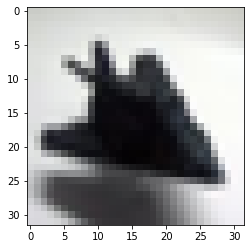

In [4]:
image,label=dataset[29]
plt.imshow(torch.permute(image,(1,2,0)))
print(label)

1


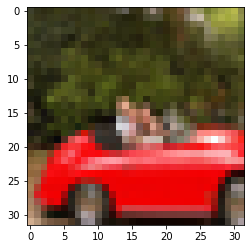

In [5]:
image,label=dataset[99]
plt.imshow(torch.permute(image,(1,2,0)))
print(label)

2


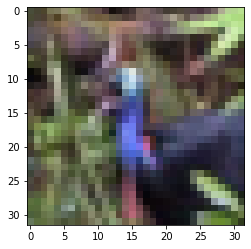

In [6]:
image,label=dataset[24]
plt.imshow(torch.permute(image,(1,2,0)))
print(label)

3


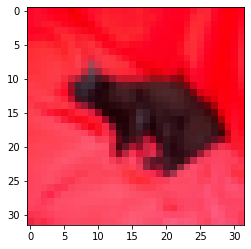

In [7]:
image,label=dataset[21]
plt.imshow(torch.permute(image,(1,2,0)))
print(label)

4


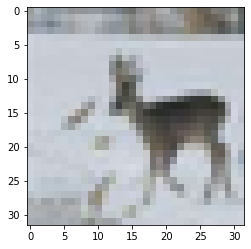

In [8]:
image,label=dataset[20]
plt.imshow(torch.permute(image,(1,2,0)))
print(label)

5


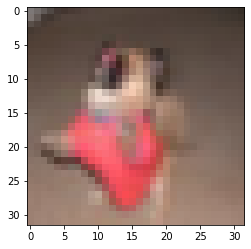

In [9]:
image,label=dataset[24323]
plt.imshow(torch.permute(image,(1,2,0)))
print(label)

6


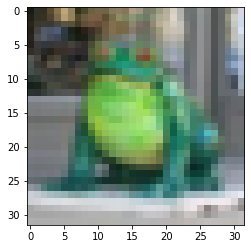

In [10]:
image,label=dataset[19]
plt.imshow(torch.permute(image,(1,2,0)))
print(label)

7


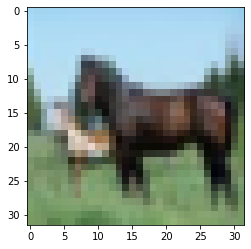

In [11]:
image,label=dataset[12]
plt.imshow(torch.permute(image,(1,2,0)))
print(label)

8


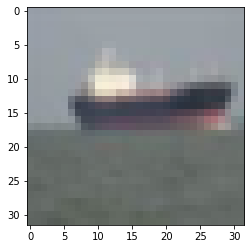

In [12]:
image,label=dataset[69]
plt.imshow(torch.permute(image,(1,2,0)))
print(label)

9


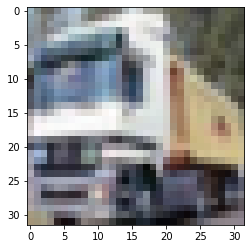

In [13]:
image,label=dataset[1]
plt.imshow(torch.permute(image,(1,2,0)))
print(label)

In [14]:
len(dataset)

50000

In [15]:
setd={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [16]:
t_ds,val_ds=random_split(dataset,[40000,10000])
t=DataLoader(t_ds,128,shuffle=True)
v=DataLoader(val_ds,128)

torch.Size([128, 3, 32, 32])
torch.Size([546, 274, 3])


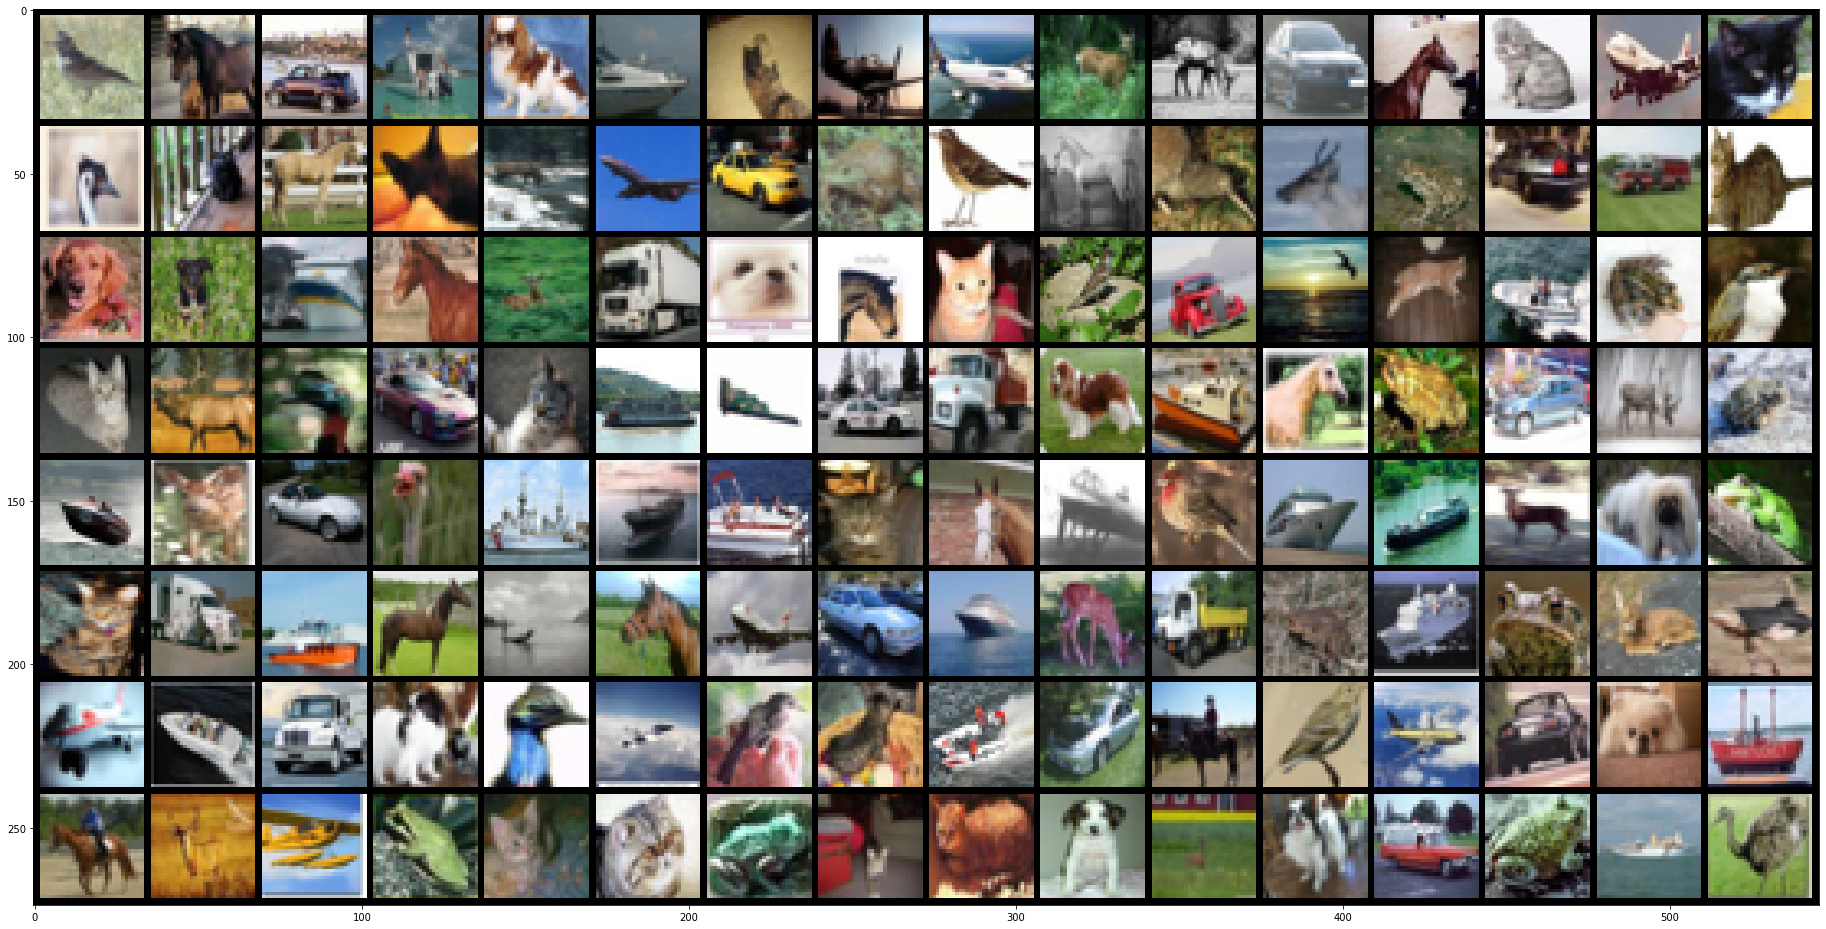

In [17]:
for img,_ in t:
    print(img.shape)
    plt.figure(figsize=(16+16,16+16))
    print(make_grid(img).permute(1,2,0).shape)
    plt.imshow(make_grid(img,nrow=16).permute(1,2,0))
    break

In [18]:
def accuracy(o,l):
    _,p=torch.max(o,dim=1)
    return torch.tensor(torch.sum(p==l).item()/len(p))

In [19]:
def evaluate(model,v):
    e=[model.validation_step(i) for i in v]
    return model.validation_epoch_end(e)

In [20]:
def fit(epochs,model,lr,train_loader,val_loader,opt_func=torch.optim.SGD):
    optimizer=opt_func(model.parameters(),lr)
    history=[]

    for epoch in range(epochs):
        for batch in train_loader:
            loss=model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        res=evaluate(model,val_loader)
        model.epoch_end(epoch,res)
        history.append(res)
    return history

In [21]:
class cifer_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(1024*3,256)
        self.layer2=nn.Linear(256,128)
        self.layer3=nn.Linear(128,64)
        self.layer4=nn.Linear(128,10)
        self.sp=nn.Softplus()
        self.m=nn.LeakyReLU()
        self.hs=nn.Hardshrink()
    def forward(self,x):
        x=x.view(x.size(0),-1)
        out=self.layer1(x)
        out=self.sp(out)
        out=self.layer2(out)
        out=self.m(out)
        out=self.layer4(out)
        return out
    def training_step(self,batch):
        i,l=batch
        out=self.forward(i)
        loss=f.cross_entropy(out,l)
        return loss
    def validation_step(self,batch):
        i,l=batch
        out=self.forward(i)
        loss=f.cross_entropy(out,l)
        acc=accuracy(out,l)
        return {"loss":loss,"acc":acc}
    def validation_epoch_end(self,out):
        batch_loss=[x["loss"] for x in out]
        batch_acc=[x["acc"] for x in out]
        epoch_loss=torch.stack(batch_loss).mean()
        epoch_acc=torch.stack(batch_acc).mean()
        return {"val_loss":epoch_loss.item(),"val_acc":epoch_acc.item()}
    def epoch_end(e,l,a):
        print("epoch[{}] loss:{} accuracy:{}".format(e,l,a))
model= cifer_model()

In [22]:
history1=fit(6,model,0.2,t,v)

epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
  (sp): Softplus(beta=1, threshold=20)
  (m): LeakyReLU(negative_slope=0.01)
  (hs): Hardshrink(0.5)
)] loss:0 accuracy:{'val_loss': 1.9083234071731567, 'val_acc': 0.31329113245010376}
epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
  (sp): Softplus(beta=1, threshold=20)
  (m): LeakyReLU(negative_slope=0.01)
  (hs): Hardshrink(0.5)
)] loss:1 accuracy:{'val_loss': 1.8128873109817505, 'val_acc': 0.34681567549705505}
epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, 

In [23]:
history2=fit(10,model,0.01,t,v)

epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
  (sp): Softplus(beta=1, threshold=20)
  (m): LeakyReLU(negative_slope=0.01)
  (hs): Hardshrink(0.5)
)] loss:0 accuracy:{'val_loss': 1.5365115404129028, 'val_acc': 0.45490506291389465}
epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
  (sp): Softplus(beta=1, threshold=20)
  (m): LeakyReLU(negative_slope=0.01)
  (hs): Hardshrink(0.5)
)] loss:1 accuracy:{'val_loss': 1.5291870832443237, 'val_acc': 0.45717957615852356}
epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, 

In [24]:
history3=fit(10,model,0.001,t,v)

epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
  (sp): Softplus(beta=1, threshold=20)
  (m): LeakyReLU(negative_slope=0.01)
  (hs): Hardshrink(0.5)
)] loss:0 accuracy:{'val_loss': 1.4919103384017944, 'val_acc': 0.4732001721858978}
epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
  (sp): Softplus(beta=1, threshold=20)
  (m): LeakyReLU(negative_slope=0.01)
  (hs): Hardshrink(0.5)
)] loss:1 accuracy:{'val_loss': 1.491426706314087, 'val_acc': 0.47250792384147644}
epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bi

In [25]:
history4=fit(10,model,0.001,t,v)

epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
  (sp): Softplus(beta=1, threshold=20)
  (m): LeakyReLU(negative_slope=0.01)
  (hs): Hardshrink(0.5)
)] loss:0 accuracy:{'val_loss': 1.488387942314148, 'val_acc': 0.4745846390724182}
epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
  (sp): Softplus(beta=1, threshold=20)
  (m): LeakyReLU(negative_slope=0.01)
  (hs): Hardshrink(0.5)
)] loss:1 accuracy:{'val_loss': 1.4878865480422974, 'val_acc': 0.4736946225166321}
epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bia

In [26]:
history5=fit(10,model,0.001,t,v)

epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
  (sp): Softplus(beta=1, threshold=20)
  (m): LeakyReLU(negative_slope=0.01)
  (hs): Hardshrink(0.5)
)] loss:0 accuracy:{'val_loss': 1.4850832223892212, 'val_acc': 0.47507911920547485}
epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
  (sp): Softplus(beta=1, threshold=20)
  (m): LeakyReLU(negative_slope=0.01)
  (hs): Hardshrink(0.5)
)] loss:1 accuracy:{'val_loss': 1.4847097396850586, 'val_acc': 0.47547468543052673}
epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, 

In [27]:
history6=fit(10,model,0.0001,t,v)

epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
  (sp): Softplus(beta=1, threshold=20)
  (m): LeakyReLU(negative_slope=0.01)
  (hs): Hardshrink(0.5)
)] loss:0 accuracy:{'val_loss': 1.4822769165039062, 'val_acc': 0.47577136754989624}
epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
  (sp): Softplus(beta=1, threshold=20)
  (m): LeakyReLU(negative_slope=0.01)
  (hs): Hardshrink(0.5)
)] loss:1 accuracy:{'val_loss': 1.482191801071167, 'val_acc': 0.475969135761261}
epoch[cifer_model(
  (layer1): Linear(in_features=3072, out_features=256, bia